In [1]:
import pandas as pd
import nltk
import numpy as np



In [2]:
df = pd.read_csv('data_preprocessed.csv')

In [3]:
df.columns

Index(['doc_id', 'Name of the document', 'Institution', 'URL', 'Authors',
       'Affiliates', 'Sector', 'Country', 'Date', 'Keywords',
       'Exclusion criteria', 'Status', 'Label', 'MapAIE (ours)', 'Jobin',
       'Fjeld', 'Tidjon', 'Hagendorff', 'Floridi', 'Zeng (LAIP)',
       'Attard-Frost', 'EP', 'Algorithm watch', 'CE', 'Winfield',
       'EthicalML GitHub', 'all sources', 'Checked by', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'text', 'langue', 'text_processed',
       'tfidf'],
      dtype='object')

In [4]:
df[['Sector', 'Institution','Country','Label','Name of the document']].head(10)

,Sector,Institution,Country,Label,Name of the document
0,NaN,Intel,NaN,SPI,Intel Recommends Public Policy Principles for ...
1,NaN,Academy of Medical Royal Colleges,UK,SPI field-specific,Artificial intelligence in Healthcare
2,NaN,Access Now,NaN,NaN,Human rights in the age of Artificial Intellig...
3,civil society,Access Now,UK,NaN,The Toronto Declaration: Protecting the right ...
4,NaN,AccessNow,USA,SPI,Europe’s approach to artificial intelligence: ...
5,NaN,AccessNow,USA,SPI,Human Rights Impact Assessments for AI: Analys...
6,NaN,AccessNow,USA,meta-analysis,Mapping Regulatory Proposals for AI in Europe
7,NaN,Ada Lovelace Institute,UK,"SPI, issue-specific",Regulating AI in Europe: four problems and fou...
8,NaN,Adapt Center,Ireland,not ai ethics,Ethics Canvas
9,NaN,Advisory Board on Artificial Intelligence and ...,Japan,SPI,Report on Artificial Intelligence and Human So...


In [5]:
df["Institution"] = df['Institution'].replace('.',np.nan) 

In [6]:
df['Institution'] = df['Institution'].str.lower()


In [7]:
df['Institution'] = df['Institution'].str.replace('.', '', regex=False).str.replace('?', '', regex=False)

In [8]:
df['Institution'].isna().sum()

np.int64(0)

In [9]:
df['Institution'] = df['Institution'].str.split(',').str[0].str.strip()
df['Institution'] = df['Institution'].str.split(';').str[0].str.strip()

In [10]:
df['Institution'] = df['Institution'].str.replace(r'\([^)]*\)', '', regex=True).str.strip()

In [11]:
df = df.dropna(subset=['Institution'])

In [12]:
df['Institution'].unique()

array(['intel', 'academy of medical royal colleges', 'access now',
       'accessnow', 'ada lovelace institute', 'adapt center',
       'advisory board on artificial intelligence and human society',
       "agenzia per l'italia digitale", 'ai council', 'ai forum',
       'ai now institute', 'ai recht', 'ai4people', 'aiei group',
       'aisoma', 'aisp', 'algorithmwatch', 'all tech is human', 'allai',
       'always designing for people', 'american college of radiology',
       'aptiv', 'armai', 'article 29 working party',
       'association for computing machinery - future of computing machinery',
       'association for computing machinery',
       'australian government - department of industry innovation and science',
       'australian human rights commission',
       'australian strategic policy institute',
       'autorité de contrôle prudentiel et de résolution', 'axon', 'bcg',
       'bertelsmann stiftung', 'biometrics and forensics ethics group',
       'bitkom', 'blackberry'

In [22]:
import pandas as pd




# Dictionnaire des catégories et mots-clés associés
categories = {
    "Gouvernements et organismes publics nationaux": [
        "Government", "Ministry", "Department", "Authority", "Council", "Office", "Agency", 
        "Republic", "State", "Presidency", "Embassy"
    ],
    "Organisations internationales et institutions supranationales": [
        "United Nations", "European Union", "Council of Europe", "OECD", "G7", "G20", 
        "European Commission", "World Bank", "World Health Organization", "NATO", "UNESCO"
    ],
    "Entreprises technologiques et multinationales": [
        "Google", "Intel", "Microsoft", "IBM", "Salesforce", "Apple", "Amazon", "Facebook", 
        "Thales", "Axon", "Philips", "BlackBerry", "Aptiv"
    ],
    "Instituts de recherche et universités": [
        "Institute", "University", "Academy", "MIT", "Stanford", "Harvard", "Oxford", 
        "Cambridge", "Fraunhofer", "Future of Humanity Institute", "Research Center", "AI Institute"
    ],
    "Comités éthiques et régulateurs": [
        "Ethics", "Council", "Commission", "Supervisory", "Advisory", "Regulator", 
        "Data Protection", "Privacy Commission", "Rights Commission", "Ethikkommission"
    ],
    "Associations professionnelles et groupes de réflexion": [
        "Association", "Forum", "Think Tank", "ACM", "IEEE", "Society", "Tech Alliance", 
        "Tech Group", "Advocacy Group", "Council"
    ],
    "ONG et initiatives de droits humains": [
        "Human Rights", "Privacy", "Access Now", "Article 19", "Amnesty International", 
        "Open Rights Group", "Freedom Online Coalition", "Humanitarian", "Advocacy"
    ],
    "Organisations intersectorielles et partenariats publics-privés": [
        "Partnership", "Alliance", "Initiative", "Coalition", "Collaboration", "Consortium", 
        "Task Force", "Forum", "Global", "Joint", "Group"
    ],
    "Organismes normatifs et de standardisation": [
        "ISO", "Standards", "Standardization", "Regulation", "European Law Institute", 
        "Certification", "Norms", "Accreditation", "Compliance"
    ],
    "Conseils et groupes consultatifs gouvernementaux": [
        "AI Council", "Board", "Advisory", "Task Force", "Council", "Mission", 
        "Strategy Group", "Committee", "AI Strategy", "Digital Service"
    ]
}

# Fonction pour trouver la catégorie d'une organisation en fonction des mots-clés
def categorize_organization(org):
    org_lower = org.lower()  # Convertir le nom de l'institution en minuscules
    for category, keywords in categories.items():
        # Comparer avec les mots-clés en minuscules
        if any(keyword.lower() in org_lower for keyword in keywords):
            return category
    return "Autres"

# Appliquer la fonction sur la colonne 'organization' et créer une nouvelle colonne 'category'
df['categorie Institution'] = df['Institution'].apply(categorize_organization)


In [23]:
df['Institution'][df['categorie Institution'] == 'Autres'].head(100)

0                                 intel
1     academy of medical royal colleges
2                            access now
3                            access now
4                             accessnow
                    ...                
95                    council of europe
96                    council of europe
97                    council of europe
98                    council of europe
99                    council of europe
Name: Institution, Length: 100, dtype: object

In [140]:
# General imports
import re
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [186]:
# Or we might want to use an already-implemented tool. The NLTK package has a lot of very useful text processing tools, among them various tokenizers
# Careful, NLTK was the first well-documented NLP package, but it might be outdated for some uses. Check the documentation !
from nltk.tokenize import word_tokenize


df['I_tokenize'] = df['Institution'].apply(lambda x: word_tokenize(str(x)))

In [18]:
df.head()

,doc_id,Name of the document,Institution,URL,Authors,Affiliates,Sector,Country,Date,Keywords,...,all sources,Checked by,Unnamed: 27,Unnamed: 28,Unnamed: 29,text,langue,text_processed,tfidf,categorie Institution
0,3,Intel Recommends Public Policy Principles for ...,intel,https://community.intel.com/t5/Blogs/Intel/Pol...,Naveen Rao,NaN,NaN,NaN,NaN,NaN,...,2.0,Maria,NaN,NaN,NaN,\n\n\n\tIntel Recommends Public Policy Princip...,en,Intel Recommends Public Policy Principles for ...,[0.01584336 0. 0. ... 0. ...,Autres
1,9,Artificial intelligence in Healthcare,academy of medical royal colleges,https://www.aomrc.org.uk/wp-content/uploads/20...,NaN,NaN,NaN,UK,NaN,NaN,...,1.0,Maria,NaN,NaN,NaN,Artificial Intelligence in HealthcareJanuary /...,en,Artificial Intelligence in HealthcareJanuary /...,[0. 0.00460673 0. ... 0. ...,Autres
2,12,Human rights in the age of Artificial Intellig...,access now,https://www.accessnow.org/cms/assets/uploads/2...,.,.,NaN,NaN,NaN,NaN,...,3.0,Tiphaine,NaN,NaN,NaN,HUMAN RIGHTS IN THE AGE OF ARTIFICIAL INTELLI...,en,HUMAN RIGHTS IN THE AGE OF ARTIFICIAL INTELLIG...,[0. 0.0039761 0. ... 0. 0...,Autres
3,13,The Toronto Declaration: Protecting the right ...,access now,https://www.torontodeclaration.org/declaration...,"Anna Bacciarelli, Joe Westby, Fanny Hidvegi, E...","Access Now, AI Now Institute at New York Unive...",civil society,UK,2018-05-16,NaN,...,7.0,Tiphaine,NaN,NaN,NaN,\n\n\n\n\nThe Toronto Declaration\n\n\n\n\n\n\...,en,The Toronto Declaration Skip to main content T...,[0. 0. 0. ... 0. 0. 0.],Autres
4,14,Europe’s approach to artificial intelligence: ...,accessnow,https://www.accessnow.org/wp-content/uploads/2...,NaN,NaN,NaN,USA,2020-12,NaN,...,1.0,Tiphaine,NaN,NaN,NaN,accessnow.org EUROPE’S APPROACH TO ARTIFICIAL ...,en,accessnow.org EUROPE ’ S APPROACH TO ARTIFICIA...,[0. 0.00197569 0. ... 0. ...,Autres


In [188]:
def count_words(texts, voc = None):
    """Vectorize text : return count of each word in the text snippets

    Parameters
    ----------
    texts : list of str
        The texts
    Returns
    -------
    vocabulary : dict
        A dictionary that points to an index in counts for each word.
    counts : ndarray, shape (n_samples, n_features)
        The counts of each word in each text.
    """
    n_samples = len(texts)
    if voc == None:
        words = set()
        for text in texts:
            words = words.union(set(text)) # list of all words
        n_features = len(words) # number of different words
        vocabulary = dict(zip(words, range(n_features))) # vocab[wd] = index ; indexisation
    else:
        vocabulary = voc
        n_features = len(voc)
    counts = np.zeros((n_samples, n_features))
    for k, text in enumerate(texts): # enumeration a k for a text[k]
        for w in text:
            if w in vocabulary:
                counts[k][vocabulary[w]] += 1.
    return vocabulary, counts

In [189]:
voc, bow = count_words(df['I_tokenize'])
print(bow.shape)

(474, 441)


In [190]:
from sklearn.feature_extraction.text import CountVectorizer

In [191]:
# Create and fit the vectorizer to the training data
vectorizer = CountVectorizer()
Bow = vectorizer.fit_transform(df['Institution'])
bow_a = Bow.toarray()
print(bow_a.shape)

(474, 426)


In [192]:
frequency = bow.sum(axis = 0)
top_words = np.argsort(frequency)[::-1]

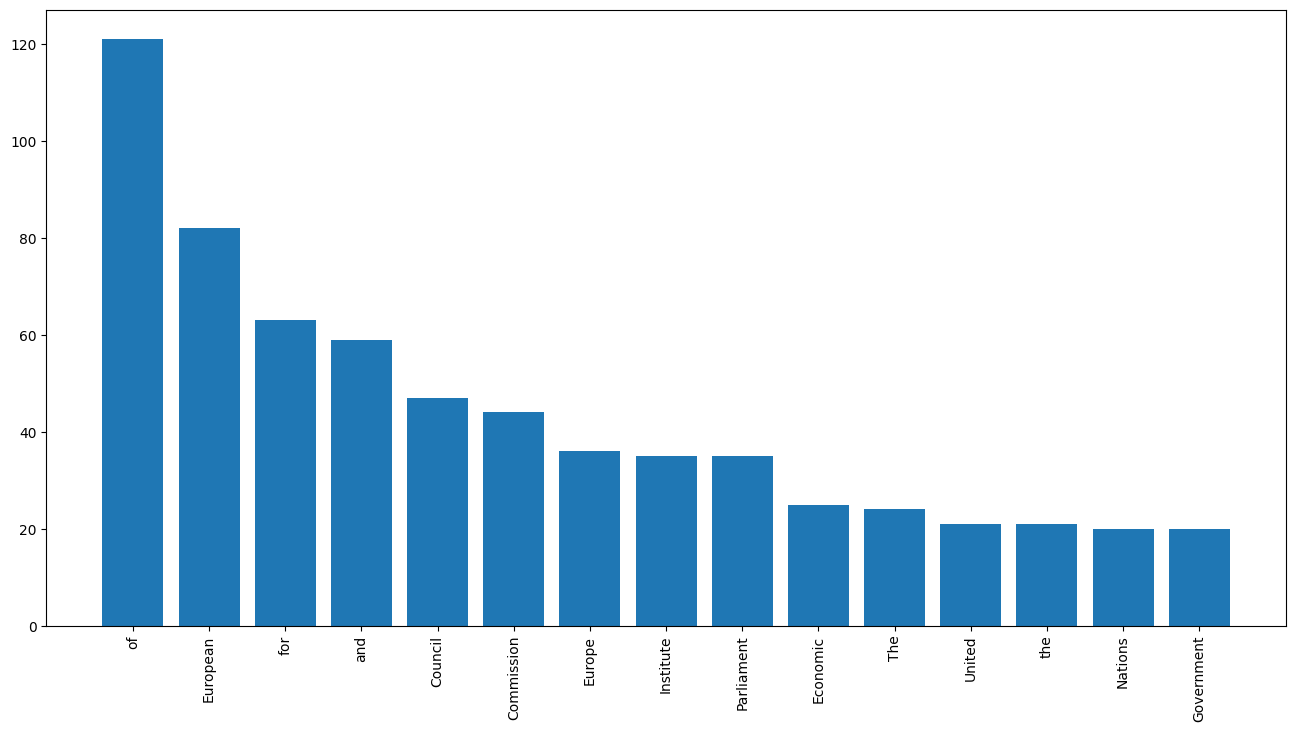

In [193]:
rev_voc = {i: w for w, i in voc.items()}
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(15), frequency[top_words[:15]])
ax.set_xticks(range(15))
ax.set_xticklabels([rev_voc[i] for i in top_words[:15]], rotation='vertical')
plt.show()

In [164]:
def euclidean(u, v):
    return np.linalg.norm(u-v)

def length_norm(u):
    return u / np.sqrt(u.dot(u))

def cosine(u, v):
    return 1.0 - length_norm(u).dot(length_norm(v))

from sklearn.neighbors import NearestNeighbors

In [168]:
def print_neighbors(distance, texts, representations, index, k=5):
    """
    Parameters
    ----------
    distance : function
        The distance to use to compare documents
    texts : list of str
        The texts
    representations: 2D Array
        Vector representations of the texts, in the same order
    index: int
        Index of the document for which to return nearest neighbors
    k: int
        Number of neighbors to display    
    """
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=distance)
    neigh.fit(representations) 
    dist, ind = neigh.kneighbors([representations[index]])
    print("Plus proches voisins de: \n '%s' \n selon la distance '%s':" % (texts[index], distance.__name__))
    print([[texts[i] for i in s[1:]]  for s in ind])
    print("\n")

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [208]:
# Create and fit the vectorizer to the training data
tfidf_vectorizer = TfidfVectorizer()
Tfidf = tfidf_vectorizer.fit_transform(df['Institution'])
tfidf_a = Tfidf.toarray()
print(tfidf_a.shape)

(474, 426)


In [199]:
print_neighbors(euclidean, df['Institution'], tfidf_a, 24)
print_neighbors(cosine, df['Institution'], tfidf_a, 24)


Plus proches voisins de: 
 'AlgorithmWatch' 
 selon la distance 'euclidean':
[['AlgorithmWatch', 'AlgorithmWatch', 'All Tech is Human', 'Article 29 Working Party']]


Plus proches voisins de: 
 'AlgorithmWatch' 
 selon la distance 'cosine':
[['AlgorithmWatch', 'AlgorithmWatch', 'Women leading in AI', 'White House']]




In [174]:
import altair as alt
import pandas as pd

In [205]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
docs_pca = pca.fit_transform(tfidf_a)

In [206]:
pca.explained_variance_ratio_

array([0.08779307, 0.06441508])

In [210]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)


kmeans.fit(tfidf_a)


labels = kmeans.labels_


print(labels)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 0 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [213]:
data = pd.DataFrame({'x': docs_pca[:,0],
                     'y': docs_pca[:,1],
                     'texte': df['Institution'],
                     'Category': labels})

In [215]:
alt.Chart(data[:]).mark_circle(size=200).encode(
    x="x", y="y",color='Category',
    tooltip=['texte']
    ).interactive().properties(
    width=500,
    height=500
)

alt.Chart(...)